<a href="https://colab.research.google.com/github/shallynagfase9/Decision-trees-Support-vector-machines/blob/main/Support_Vector_Regressor_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [17]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [18]:
X

array([[ 1.24955601,  0.06500957],
       [-1.28051719, -0.08018644],
       [-0.00525647,  0.13319888],
       ...,
       [-0.75473962,  0.69942702],
       [-1.07722678, -0.61958215],
       [ 1.20863376, -1.71414171]])

In [19]:
y

array([ 4.86540609e+01, -5.37108736e+01,  1.02201715e+01,  4.31341908e+01,
       -1.11608310e+02, -6.41271008e+01,  7.41937919e+01,  4.04113427e+01,
        5.22981868e+01,  3.57119053e+01,  5.59360642e+01,  5.83731009e+01,
        6.79826337e+01,  1.22503665e+02,  1.11499332e+02, -5.20030135e+00,
       -2.84772152e+00,  1.23901682e+01,  4.62013220e+01,  9.30765959e+01,
        1.54620709e+02,  7.33413446e+00, -9.18612993e+01,  2.86552307e+01,
        3.38540335e+01,  9.00953292e+00, -1.24997276e+02, -3.64556533e+01,
       -7.73450445e+01,  9.69952056e+01,  4.05887051e+01, -6.52969367e+01,
       -4.51532756e+00, -1.91153541e+01,  3.79665341e+01, -6.48368745e+01,
        6.38140563e+00, -9.62020552e+00,  1.96063610e+01, -2.17914002e+01,
       -1.24583355e+00, -2.66307789e+01, -7.67706145e+01, -4.22941591e+01,
       -5.12799320e+01,  9.35170013e+01, -5.20087835e+01, -8.82774746e+01,
       -8.90168993e+01, -2.31557638e+01,  1.57884237e+02,  6.19765504e+01,
       -8.94068203e+01, -

In [20]:
pd.DataFrame(X)[0]

0      1.249556
1     -1.280517
2     -0.005256
3      0.007908
4     -1.103948
         ...   
995    0.009162
996   -0.784165
997   -0.754740
998   -1.077227
999    1.208634
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

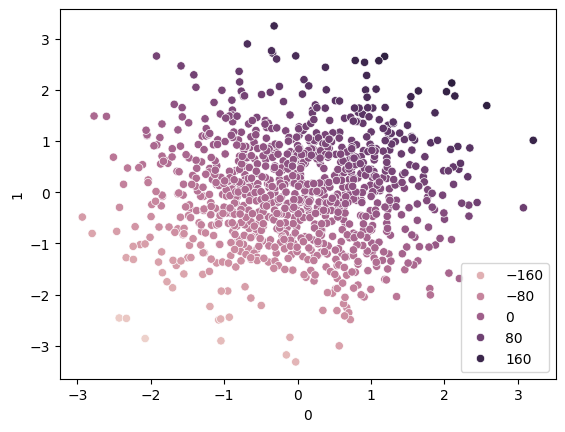

In [21]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [23]:
from sklearn.svm import SVR

In [24]:
svr=SVR(kernel='linear')

In [25]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [26]:
svr.coef_

array([[34.24001374, 50.82161893]])

In [27]:
## Prediction
y_pred=svr.predict(X_test)

In [28]:
y_pred

array([ -61.29081361,  -97.98699287,   13.43636228,  -21.34650471,
        -28.80517383,  107.2338976 ,  -81.94161355,  -76.02722485,
         56.25225295,  -67.36792077,  -32.07838193,    1.14030343,
         10.7702778 ,  -17.5559314 ,  -77.35553853,  -51.3123537 ,
        -46.22859012,   23.86441826,   -6.59024269,   -7.57107296,
          4.07403196,  -77.32691511,  -41.43842651,  -19.13621721,
        -11.03045934,   -0.9893529 ,    7.75505641, -216.75171947,
        -47.99756008,   -5.67170419,   57.00296988,   -9.5963334 ,
        -18.40707912,   12.32979312,   92.43811108,  -57.37832995,
          3.6062182 ,  105.92917379,   -8.56964434,    1.08220884,
        -52.86328143,  -68.08302573,   13.42468783,    9.65413071,
         47.81201157,  -22.12798897,   70.60775066,   91.71901296,
        -40.64104755,  -16.92962216,  -37.58022706,  -19.81858849,
        -45.3937339 ,  -13.6556569 , -134.56605097,  -51.57010353,
         57.05763428,  -31.25135363,   -0.41490335,  -92.05018

In [29]:
from sklearn.metrics import r2_score

In [30]:
print(r2_score(y_test,y_pred))

0.997172484092467


Hyperparametere Tuning With SVR

In [31]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [36]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,scoring='neg_mean_squared_error',cv=5,verbose=3)


In [37]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-141.341 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-155.536 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-197.221 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-190.954 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-209.477 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-141.341 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-155.536 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-197.221 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-190.954 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-209.477 total time=   0.0s
[CV 1/5]

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [38]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [39]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9971899616161116
